In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pgmpy.estimators import PC
from pgmpy.models import BayesianNetwork

In [2]:
covid_policies_df = pd.read_csv(
    "../data/processed/categorical_policies.csv"
)
covid_policies_df.set_index(["country", "date"], inplace=True)
print(covid_policies_df.shape)
covid_policies_df.head()

(11993, 19)


school_closures  workplace_closures  \
country   date                                              
argentina 2020-05-02                3                   3   
          2020-05-03                3                   3   
          2020-05-04                3                   3   
          2020-05-05                3                   3   
          2020-05-06                3                   3   

                      cancel_public_events  restrict_public_gathering  \
country   date                                                          
argentina 2020-05-02                     2                          4   
          2020-05-03                     2                          4   
          2020-05-04                     2                          4   
          2020-05-05                     2                          4   
          2020-05-06                     2                          4   

                      closure_public_transport  shn_requirement  \
country   date                                                    
argentina 2020-05-02                         2                2   
          2020-05-03                         2                2   
          2020-05-04                         2                2   
          2020-05-05                         2                2   
          2020-05-06                         2                2   

                      restriction_internal_movement  \
country   date                                        
argentina 2020-05-02                              1   
          2020-05-03                              1   
          2020-05-04                              1   
          2020-05-05                              1   
          2020-05-06                              1   

                      internation_travel_control  pi_campaign  testing_policy  \
country   date                                                                  
argentina 2020-05-02                         4.0            2             1.0   
          2020-05-03                         4.0            2             1.0   
          2020-05-04                         4.0            2             1.0   
          2020-05-05                         4.0            2             1.0   
          2020-05-06                         4.0            2             1.0   

                      contact_tracing  facial_covering  vaccine_policy  \
country   date                                                           
argentina 2020-05-02              2.0                3               0   
          2020-05-03              2.0                3               0   
          2020-05-04              2.0                3               0   
          2020-05-05              2.0                3               0   
          2020-05-06              2.0                3               0   

                      income_support  debt_relief  confirmed_cases  \
country   date                                                       
argentina 2020-05-02               1          2.0           4681.0   
          2020-05-03               1          2.0           4783.0   
          2020-05-04               1          2.0           4887.0   
          2020-05-05               1          2.0           5020.0   
          2020-05-06               1          2.0           5208.0   

                      confirmed_deathes  cases_per_mil  cases_per_mil_cat  
country   date                                                             
argentina 2020-05-02              237.0     102.093784                  0  
          2020-05-03              246.0     104.318430                  0  
          2020-05-04              260.0     106.586696                  0  
          2020-05-05              264.0     109.487459                  0  
          2020-05-06              273.0     113.587786                  0

In [3]:
sg_filtered = covid_policies_df.loc[
    "singapore",
    [
        "school_closures",
        "workplace_closures",
        #         "cancel_public_events",
        #         "restrict_public_gathering",
        #         "closure_public_transport",
        "cases_per_mil",
        "cases_per_mil_cat",
        "confirmed_cases",
    ],
]
sg_filtered.head()

,school_closures,workplace_closures,cases_per_mil,cases_per_mil_cat,confirmed_cases
date,,,,,
2020-05-02,3,3,3219.816514,0,17548.0
2020-05-03,3,3,3340.366972,0,18205.0
2020-05-04,3,3,3445.504587,0,18778.0
2020-05-05,3,3,3561.467890,0,19410.0
2020-05-06,3,3,3706.055046,0,20198.0


In [4]:
ml_filtered = covid_policies_df.loc[
    "malaysia",
    [
        "school_closures",
        "workplace_closures",
        #         "cancel_public_events",
        #         "restrict_public_gathering",
        #         "closure_public_transport",
        "cases_per_mil",
        "cases_per_mil_cat",
        "confirmed_cases",
    ],
]

ml_filtered.head()

,school_closures,workplace_closures,cases_per_mil,cases_per_mil_cat,confirmed_cases
date,,,,,
2020-05-02,3,3,193.00000,0,6176.0
2020-05-03,3,3,196.81250,0,6298.0
2020-05-04,3,2,198.53125,0,6353.0
2020-05-05,3,2,199.46875,0,6383.0
2020-05-06,3,2,200.87500,0,6428.0


<AxesSubplot:xlabel='cases_per_mil', ylabel='Count'>

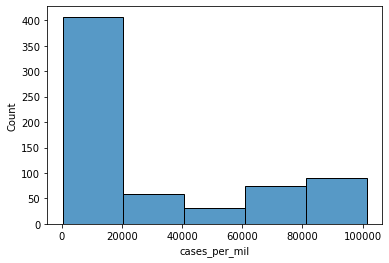

In [5]:
import seaborn as sns

sns.histplot(ml_filtered.cases_per_mil, bins=5)

In [6]:
g = ml_filtered.groupby(by=["school_closures", "workplace_closures"])
g.size()

school_closures  workplace_closures
0                2                      23
                 3                      19
1                1                      12
                 2                      16
                 3                      11
2                1                     106
                 2                      52
                 3                      74
3                1                      29
                 2                     196
                 3                     123
dtype: int64

In [7]:
# from pgmpy.estimators import PC

# est = PC(data=sg_filtered[["school_closures", "workplace_closures", "cases_per_mil_cat"]].iloc[:500], )
# res = est.estimate(max_cond_vars=3)
# import networkx as nx

# nx.draw(res, with_labels=True)

## Contruct MRF with a subset of features

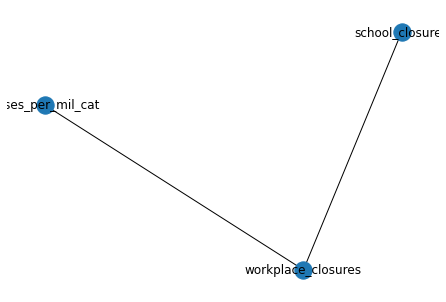

In [8]:
import networkx as nx
from pgmpy.models import MarkovNetwork, BayesianNetwork

# G = MarkovNetwork()
# G.add_nodes_from(["school_closures", "workplace_closures", "cases_per_mil_cat"])
# G.add_edges_from([("school_closures", "workplace_closures"),
#                   ("workplace_closures", "cases_per_mil_cat")
#                  ])
# nx.draw(G, with_labels=True)


sample_model = BayesianNetwork(
    [
        ("school_closures", "workplace_closures"),
        ("workplace_closures", "cases_per_mil_cat"),
    ]
)
G = sample_model.to_markov_model()
nx.draw(G, with_labels=True)

In [9]:
for column in ["school_closures", "workplace_closures", "cases_per_mil_cat"]:
    print(column, ml_filtered[column].unique())

school_closures [3 2 1 0]
workplace_closures [3 2 1]
cases_per_mil_cat [0 1 2 3 4 5]


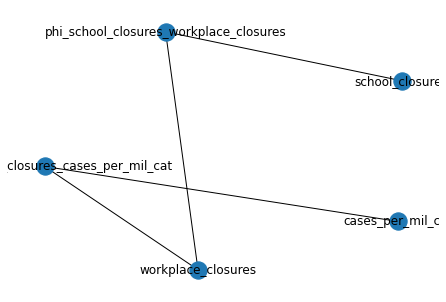

In [10]:
from pgmpy.factors.discrete import DiscreteFactor
factor1 = DiscreteFactor(["school_closures", "workplace_closures"], [4, 3], abs(np.random.randn(12)))
factor2 = DiscreteFactor(["workplace_closures", "cases_per_mil_cat"], [3, 6], abs(np.random.randn(18)))
G.add_factors(factor1, factor2)
nx.draw(G.to_factor_graph(), with_labels=True)

In [11]:
from pgmpy.inference import BeliefPropagation
bp = BeliefPropagation(G)
print(bp.map_query(["cases_per_mil_cat"], evidence={"school_closures": 1, "workplace_closures": 1}))
print(bp.map_query(["cases_per_mil_cat"], evidence={"school_closures": 3, "workplace_closures": 2}))

0it [00:00, ?it/s]

{'cases_per_mil_cat': 0}


0it [00:00, ?it/s]

{'cases_per_mil_cat': 0}


In [13]:
from pgmpy.sampling import GibbsSampling
gibbs = GibbsSampling(G)
tlo

  0%|          | 0/3 [00:00<?, ?it/s]

/Users/krishnakumar/miniconda3/envs/deeplearn_course/lib/python3.7/site-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: 2.220446049250313e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."
/Users/krishnakumar/miniconda3/envs/deeplearn_course/lib/python3.7/site-packages/pgmpy/utils/mathext.py:84: UserWarning: Probability values don't exactly sum to 1. Differ by: 1.1102230246251565e-16. Adjusting values.
  f"Probability values don't exactly sum to 1. Differ by: {error}. Adjusting values."


,school_closures,workplace_closures,cases_per_mil_cat
0,0,0,0
1,1,1,1
2,2,2,3
3,3,2,5
